In [76]:
import time

In [71]:
import requests as req
from bs4 import BeautifulSoup

In [94]:
import pandas as pd
import numpy as np
df = pd.read_excel('../data/korea_map_21th_election_type_b_data.xlsx')
df.head()

,X,Y,선거구명 전체,시도명,선거구명
0,0,7,인천 서구갑,인천,서구갑
1,0,8,인천 서구을,인천,서구을
2,0,9,인천 중구강화군옹진군,인천,중구강화군옹진군
3,0,17,전남 목포시,전남,목포시
4,0,18,전남 나주시화순군,전남,나주시화순군


In [87]:
mbc = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
sunggeogu = df['시도명'].value_counts()

election = {}
for name in mbc:
    election[mbc.index(name)+1]=sunggeogu[name]
election

{1: 49,
 2: 18,
 3: 12,
 4: 13,
 5: 8,
 6: 7,
 7: 6,
 8: 2,
 9: 59,
 10: 8,
 11: 8,
 12: 11,
 13: 10,
 14: 10,
 15: 13,
 16: 16,
 17: 3}

In [90]:
rows = []
for sudo in list(election.keys()):
    for sungeo in range(1,election[sudo] + 1):
        url = "https://vote2020.imbc.com/Api/AreaHuboList?sido={}&sungeo={}&isPoll=Y&callback=AreaHuboList_9_12Y_202004151849"
        html = req.get(url.format(sudo, sungeo)).text
        html = html.replace('AreaHuboList_9_12Y_202004151849("','').replace('")"',"")
        soup = BeautifulSoup(html, 'html.parser')
        try:
            town = soup.find("strong").text
            name = soup.find_all('p')
            party = soup.find_all('span')

            row = [town]
            for n in name:
                row.append(n.text)
            for p in party:
                if p.text:
                    row.append(p.text)
            rows.append(row)
            time.sleep(1)
        except:
            print(sudo, sungeo, url)
            continue

In [113]:
df = pd.DataFrame(rows, columns=['선거구명 전체','이름_1','이름_2','정당_1','확률_1','정당_2','확률_2'])
df = df.sort_values('선거구명 전체')
df

,선거구명 전체,이름_1,이름_2,정당_1,확률_1,정당_2,확률_2
178,강원 강릉시,권성동,김경수,무소속,41.5%,더불어민주당,38.6%
179,강원 동해시태백시삼척시정선군,이철규,김동완,미래통합당,56.8%,더불어민주당,41.1%
180,강원 속초시인제군고성군양양군,이양수,이동기,미래통합당,56.4%,더불어민주당,42%
176,강원 원주시갑,이광재,박정하,더불어민주당,46.3%,미래통합당,43.2%
177,강원 원주시을,송기헌,이강후,더불어민주당,51.7%,미래통합당,45.5%
...,...,...,...,...,...,...,...
182,충북 청주시상당구,정정순,윤갑근,더불어민주당,46.1%,미래통합당,45.4%
183,충북 청주시서원구,최현호,이장섭,미래통합당,49.4%,더불어민주당,47.7%
185,충북 청주시청원구,변재일,김수민,더불어민주당,54.9%,미래통합당,42.7%
184,충북 청주시흥덕구,도종환,정우택,더불어민주당,55.3%,미래통합당,43.8%


In [114]:
import platform

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [115]:
BORDER_LINES = [
    [[1, 1, 5, 5, 1], [18, 20, 20, 18, 18]],# 광주광역시
    [[1, 2, 2, 5, 5, 1, 1, 3, 3, 0, 0, 1, 1], [22, 22, 21, 21, 20, 20, 18, 18, 17, 17, 20, 20, 22]],# 전라남도
    [[14, 14, 15, 15, 16, 16, 16, 14], [20, 22, 22, 21, 21, 21, 20, 20]],# 제주도
    [[2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 2], [14, 16, 16, 17, 17, 18, 18, 16, 16, 14, 14]],# 전라북도
    [ [4, 4, 6, 6, 7, 7, 6, 6, 4], [14, 16, 16, 15, 15, 12, 12, 14, 14]],# 대전광역시
    [[4, 4, 6, 6], [14, 13, 13, 14]],# 세종특별시
    [[2, 1, 1, 2, 2, 3, 3, 5, 5, 6, 6], [14, 14, 13, 13, 12, 12, 10, 10, 12, 12, 13]],# 충청남도
    [[2, 1, 1, 0, 0, 2, 2, 3, 3, 4, 4] , [12, 12, 10, 10, 7, 7, 8, 8, 9, 9, 10]], # 인천광역시
    [[9, 9, 6, 6, 5, 4, 4, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 12, 12, 14, 14, 13, 13],
    [1, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 8, 8, 9, 9, 10, 10, 12, 12, 12, 10, 10, 9, 9, 3]], # 경기도
    [[13, 9, 9, 12, 12, 11, 11, 8, 8, 5, 5, 3, 3, 4, 4, 6, 6, 7, 7, 9],
     [3, 3, 4, 4, 7, 7, 8, 8, 9, 9, 8, 8, 6, 6, 3, 3, 2, 2, 1, 1]], # 경기도
    [[9, 10, 10, 11, 11, 13, 13, 12, 12, 9],
     [1, 1, 2, 2, 3, 3, 1, 1, 0, 0]], # 강원도
    [[5, 6, 6, 7, 7, 8, 8, 9, 9, 7, 7],
     [21, 21, 22, 22, 19, 19, 17, 17, 16, 16, 15]], # 경상남도
    [[7, 9, 9, 12, 12, 13, 13, 14, 14, 12, 12, 10, 10, 9],
     [20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 16, 16]], # 부산광역시
    [[7, 9, 9, 10, 10, 12, 12], [13, 13, 14, 14, 13, 13, 15]], # 대구광역시
    [[12, 13, 13, 15, 15, 14, 14], [14, 14, 13, 13, 14, 14, 16]], # 울산광역시
    [[12, 12, 13, 13, 14, 14, 13, 13, 14, 14, 15, 15, 16, 16, 15, 15],
     [13, 12, 12, 10, 10, 9, 9, 6, 6, 9, 9, 11, 11, 12, 12, 13]], # 경상북도
]

In [116]:
election_map = pd.read_excel('../data/korea_map_21th_election_type_b_displayname.xlsx')
election_map = election_map[['X','Y','선거구명 전체', '표기이름']].sort_values('선거구명 전체')
election_map

,X,Y,선거구명 전체,표기이름
216,12,1,강원 강릉시,강릉시
217,12,2,강원 동해시태백시삼척시정선군,동해 태백\n삼척 정선
197,11,0,강원 속초시인제군고성군양양군,속초 인제\n고성 양양
179,10,1,강원 원주시갑,원주 갑
199,11,2,강원 원주시을,원주 을
...,...,...,...,...
190,10,12,충북 청주시상당구,청주 상당
151,8,12,충북 청주시서원구,청주 서원
131,7,12,충북 청주시청원구,청주 청원
171,9,12,충북 청주시흥덕구,청주 흥덕


In [117]:
# 합병전 데이터 비교
for l1, l2 in zip(election_map['선거구명 전체'], df['선거구명 전체']):
    if l1 != l2 :
        print(l1, l2)

In [119]:
# 데이터 병합
df_election = pd.merge(election_map, df)
df_election.head()

,X,Y,선거구명 전체,표기이름,이름_1,이름_2,정당_1,확률_1,정당_2,확률_2
0,12,1,강원 강릉시,강릉시,권성동,김경수,무소속,41.5%,더불어민주당,38.6%
1,12,2,강원 동해시태백시삼척시정선군,동해 태백\n삼척 정선,이철규,김동완,미래통합당,56.8%,더불어민주당,41.1%
2,11,0,강원 속초시인제군고성군양양군,속초 인제\n고성 양양,이양수,이동기,미래통합당,56.4%,더불어민주당,42%
3,10,1,강원 원주시갑,원주 갑,이광재,박정하,더불어민주당,46.3%,미래통합당,43.2%
4,11,2,강원 원주시을,원주 을,송기헌,이강후,더불어민주당,51.7%,미래통합당,45.5%


In [124]:
# 0.1%라고 이기고 있는 지역
df_election.groupby('정당_1')['선거구명 전체'].agg(['count'])

,count
정당_1,
더불어민주당,154
무소속,4
미래통합당,94
정의당,1


In [142]:
# 데이터 시각화를 위한 값 추가
for num, party in enumerate(df_election['정당_1'].unique()):
    df_election.loc[df_election['정당_1'] == party, 'SUCCESSFUL'] = num
    
df_election

,X,Y,선거구명 전체,표기이름,이름_1,이름_2,정당_1,확률_1,정당_2,확률_2,SUCCESSFUL
0,12,1,강원 강릉시,강릉시,권성동,김경수,무소속,41.5%,더불어민주당,38.6%,0.0
1,12,2,강원 동해시태백시삼척시정선군,동해 태백\n삼척 정선,이철규,김동완,미래통합당,56.8%,더불어민주당,41.1%,1.0
2,11,0,강원 속초시인제군고성군양양군,속초 인제\n고성 양양,이양수,이동기,미래통합당,56.4%,더불어민주당,42%,1.0
3,10,1,강원 원주시갑,원주 갑,이광재,박정하,더불어민주당,46.3%,미래통합당,43.2%,2.0
4,11,2,강원 원주시을,원주 을,송기헌,이강후,더불어민주당,51.7%,미래통합당,45.5%,2.0
...,...,...,...,...,...,...,...,...,...,...,...
248,10,12,충북 청주시상당구,청주 상당,정정순,윤갑근,더불어민주당,46.1%,미래통합당,45.4%,2.0
249,8,12,충북 청주시서원구,청주 서원,최현호,이장섭,미래통합당,49.4%,더불어민주당,47.7%,1.0
250,7,12,충북 청주시청원구,청주 청원,변재일,김수민,더불어민주당,54.9%,미래통합당,42.7%,2.0
251,9,12,충북 청주시흥덕구,청주 흥덕,도종환,정우택,더불어민주당,55.3%,미래통합당,43.8%,2.0


In [143]:
# 데이터 시각화를 위한 지도 생성

final = df_election.pivot_table(index='Y', columns='X', values='SUCCESSFUL', aggfunc='first')
final

X,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Y,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN
2,NaN,NaN,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN
3,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
4,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
5,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN
6,NaN,NaN,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,NaN,NaN
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN
8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN


In [ ]:
# 색상 부여
from matplotlib.colors import LinearSegmentedColormap

color = {
    '무소속':'#869ba5',
    '미래통합당':'#ef426f',
    '더불어민주당':'#1a4fa2',
    '정의당':'#facc03',
}
cm = LinearSegmentedColormap.from_list('election', list(color.values()), N=4)

In [164]:
df_election.head()

,X,Y,선거구명 전체,표기이름,이름_1,이름_2,정당_1,확률_1,정당_2,확률_2,SUCCESSFUL
0,12,1,강원 강릉시,강릉시,권성동,김경수,무소속,41.5%,더불어민주당,38.6%,0.0
1,12,2,강원 동해시태백시삼척시정선군,동해 태백\n삼척 정선,이철규,김동완,미래통합당,56.8%,더불어민주당,41.1%,1.0
2,11,0,강원 속초시인제군고성군양양군,속초 인제\n고성 양양,이양수,이동기,미래통합당,56.4%,더불어민주당,42%,1.0
3,10,1,강원 원주시갑,원주 갑,이광재,박정하,더불어민주당,46.3%,미래통합당,43.2%,2.0
4,11,2,강원 원주시을,원주 을,송기헌,이강후,더불어민주당,51.7%,미래통합당,45.5%,2.0


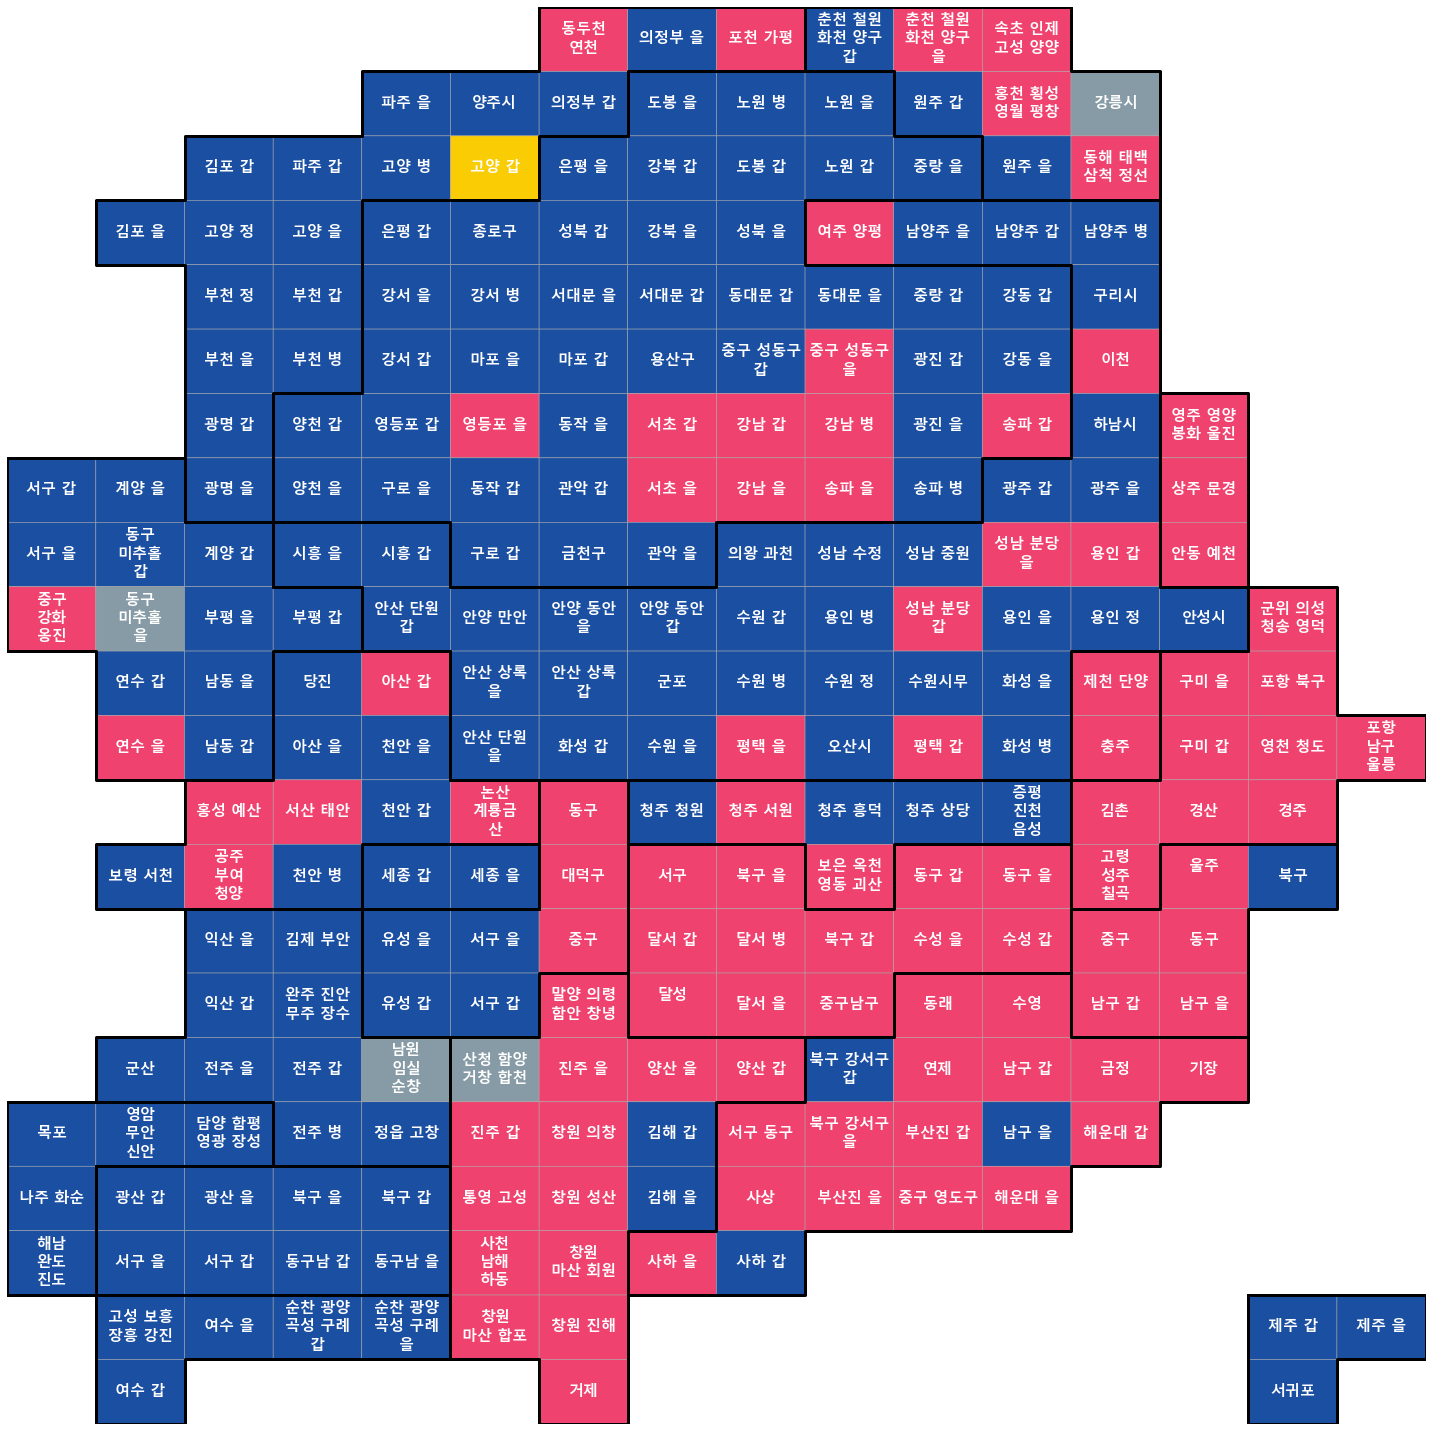

In [165]:
plt.figure(figsize=(20, 20))

plt.pcolor(final, cmap=cm, edgecolor='#aaaaaa', linewidth=0.5)

for idx, row in df_election.iterrows():
    name = row['표기이름']
    plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                 fontsize=15, ha='center', va='center', color='white')

for path in BORDER_LINES:
    x, y = path
    plt.plot(x, y, c='black', lw=3)
    
plt.gca().invert_yaxis()

plt.axis('off')
plt.tight_layout()
plt.savefig('../출구조사결과.png')
plt.show()

In [166]:
df_election.to_excel('../data/korea_map_21th_election_type_b_predict.xlsx', index=False)

In [173]:
df_election['갭'] = round(abs(df_election['확률_1'].str.replace('%', '').astype('float')-df_election['확률_2'].str.replace('%', '').astype('float')),2)

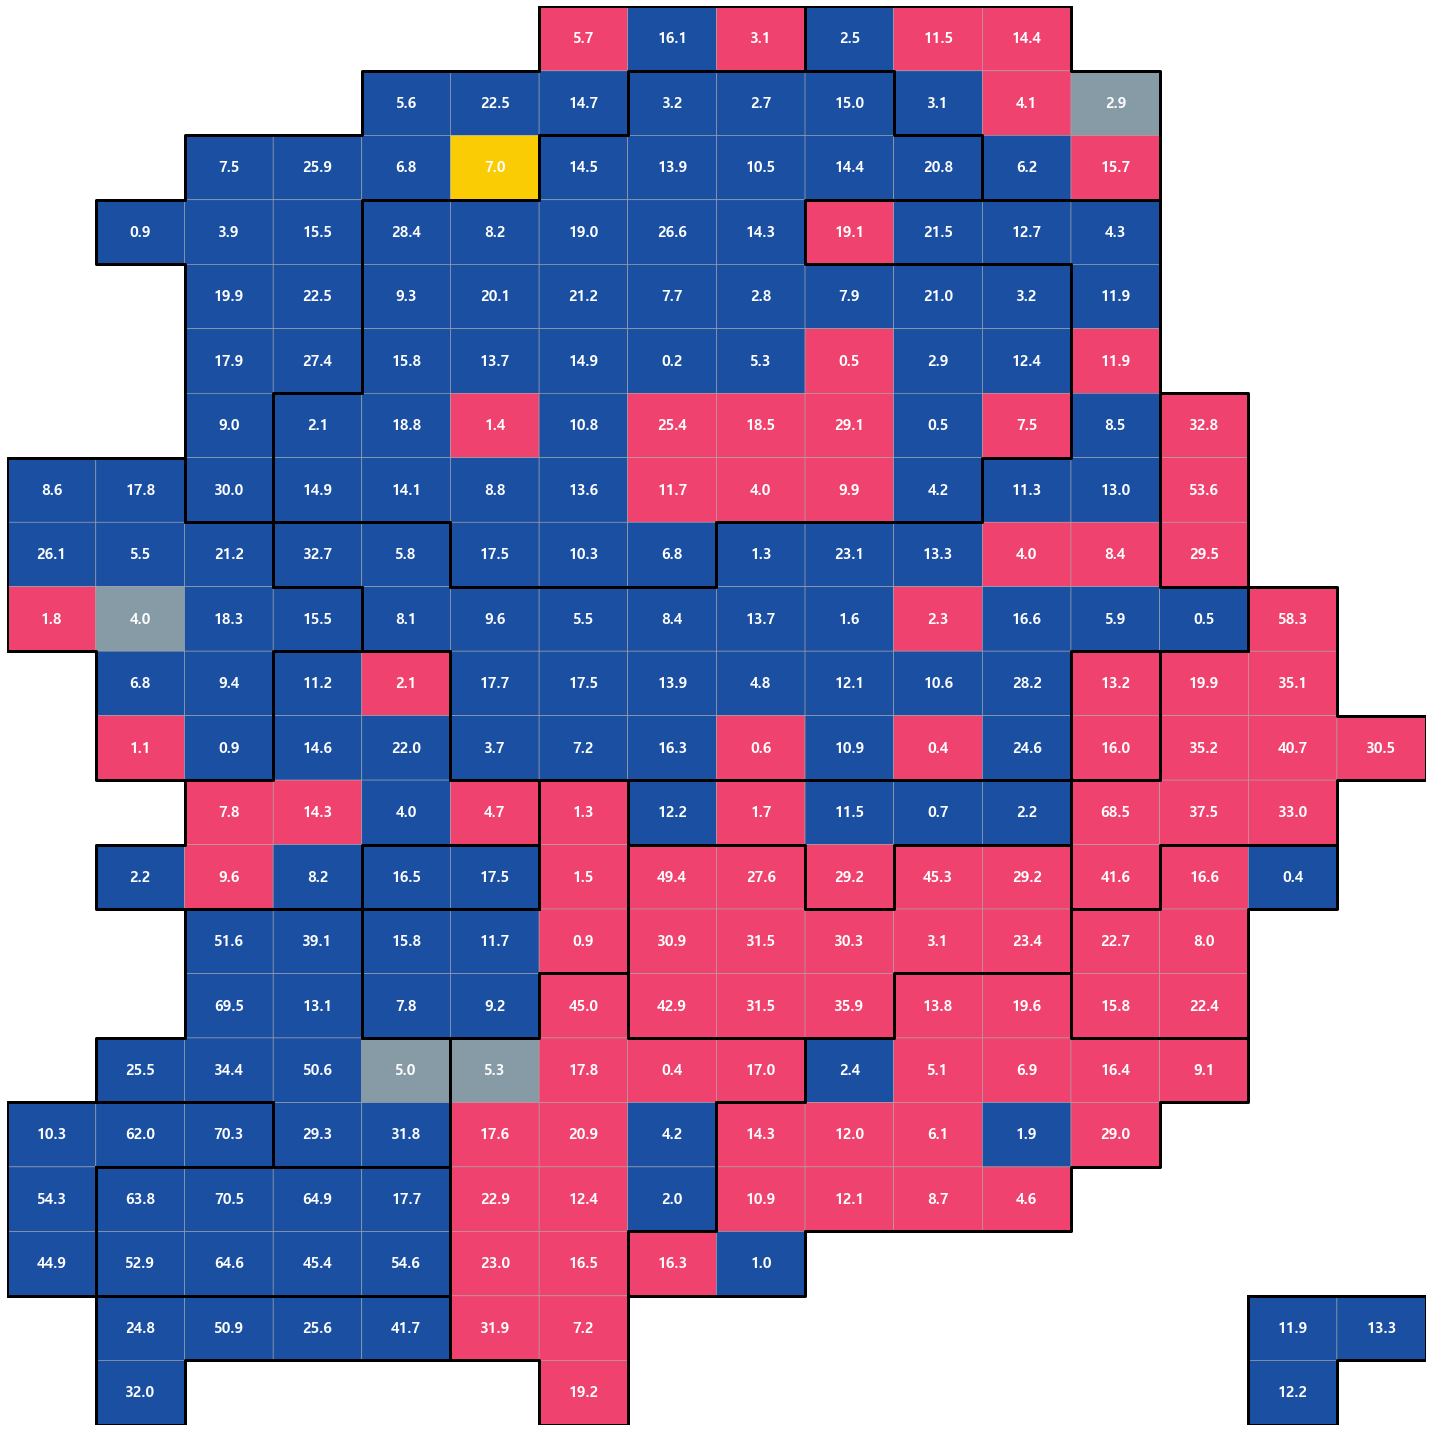

In [175]:
plt.figure(figsize=(20, 20))

plt.pcolor(final, cmap=cm, edgecolor='#aaaaaa', linewidth=0.5)

for idx, row in df_election.iterrows():
    name = row['갭']
    plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                 fontsize=15, ha='center', va='center', color='white')

for path in BORDER_LINES:
    x, y = path
    plt.plot(x, y, c='black', lw=3)
    
plt.gca().invert_yaxis()

plt.axis('off')
plt.tight_layout()
plt.savefig('../출구조사차이.png')
plt.show()